In [ ]:
# make samples for aggregates over full tables - should be easy -2:43 pm 3/29

In [32]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_parquet("lineitem.parquet")

# Display the DataFrame
print(df)

         l_orderkey  l_partkey  l_suppkey  l_linenumber l_quantity  \
0                 1     155190       7706             1      17.00   
1                 1      67310       7311             2      36.00   
2                 1      63700       3701             3       8.00   
3                 1       2132       4633             4      28.00   
4                 1      24027       1534             5      24.00   
...             ...        ...        ...           ...        ...   
6001210     5999975       7272       2273             1      32.00   
6001211     5999975       6452       1453             2       7.00   
6001212     5999975      37131       2138             3      18.00   
6001213     6000000      32255       2256             1       5.00   
6001214     6000000      96127       6128             2      28.00   

        l_extendedprice l_discount l_tax l_returnflag l_linestatus  \
0              21168.23       0.04  0.02            N            O   
1              4598

In [6]:
# how large of samples
# variance of columns
df["l_quantity"].mean()

25.507967136654827

In [20]:
df["l_quantity"].astype(float).sort_values().std()

14.426262536957228

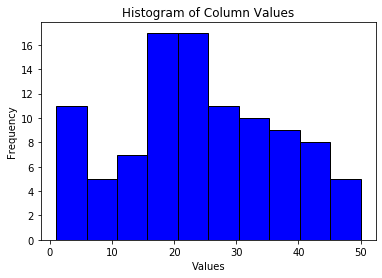

In [56]:
import pandas as pd
import matplotlib.pyplot as plt


# Plot histogram
plt.hist(sample["l_quantity"].astype(float), bins=10, color='blue', edgecolor='black')

# Add labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Column Values')

# Display the histogram
plt.show()


In [43]:
# generate sample
def reservoirSampling(n,data):
    pass
sample = df.sample(n=100)
N = df.shape[0]
n=100
print(N)

6001215


In [44]:
# use hoeffding's inequality for mean
print(sample["l_quantity"].astype(float).sort_values().mean())
sample_std = sample["l_quantity"].astype(float).sort_values().std()
print(sample["l_quantity"].min())
# 95 % confidence interval:
print(np.sqrt(2.0*(49 ** 2)/100 *np.log(2/.05)))
print(1.96*np.sqrt(1-n/N)* sample_std /np.sqrt(n))


28.72
1.00
13.309394854258072
2.7201274263164943


In [36]:
0 == 0.0

True

In [59]:
m= 2000
fails = 0

actual_mean = df["l_quantity"].astype(float).mean()
for i in range(m):
    print("\r", i, end= "")
    sample = df.sample(n=100)
    q = sample["l_quantity"].astype(float)
    avg = q.mean()
    sample_std = q.std()
    one_dim_ci = 1.96*np.sqrt(1-n/N)* sample_std /np.sqrt(n)
    if (abs(avg-actual_mean)>= one_dim_ci):
        fails += 1
print()
print(fails)
    
    
    

 199956921936101411341265135814121887
121


In [58]:
print(one_dim_ci)

2.485372675500018


In [60]:
count_187745 = (df['l_partkey'] == 187745).sum()
print("Number of times 187745 appears in the column:", count_187745)

Number of times 187745 appears in the column: 36


In [62]:
distinct_count = df['l_comment'].nunique()
print("Number of distinct values in the column:", distinct_count)

Number of distinct values in the column: 3610733


In [65]:
df["l_shipdate"]

datetime.date(1998, 12, 1)

In [ ]:
# query 1
# stratify based on ship_date
# every 6 months?
# calculate size of strata
# sample proportionately - is this optimal?
# clustering? - no (must be random sample of strata)